# Finding Exoplanets through various methods



## Start with loading basic packages

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
#%matplotlib inline

df = pd.read_csv("../exoTrain.csv")
df_const = df.copy()
df.head(6)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
5,2,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16


In [2]:
# there are 5087 observations(rows) and 3198 features(columns)

# Solve the problem using Principle Component Analysis (PCA)

## Standardize the Data

In [3]:
# store Flux 1-3192 in a matrix
x = df.iloc[:, 1:]
features = x.columns.values

In [4]:
# the matrix represents 5087 observations or candidates and 3197 different fluxes over time excluding the label feature
x_train = x.values #in matrix
x_train.shape
#print(x_train.shape)
#print(x_train)

(5087, 3197)

In [5]:
# store Label in a matrix
y_train = df.loc[:,['LABEL']].values
# the matrix represents 5087 observations or candidates and 1 Label column that consists of Label 1 as confirmed non-exoplanet
# and Label 2 as confirmed exoplanet 
#print(y_train.shape)
#print(y_train)


In [6]:
time = np.arange(3197)
print(time)

[   0    1    2 ... 3194 3195 3196]


In [7]:
fig = plt.figure(figsize=(10, 6))

for i in range(6):
    ax = fig.add_subplot(3, 2, i+1)
    ax.plot(time, x_train[i,:])
    ax.set_xlabel('Time')
    ax.set_ylabel('Flux Level')

<IPython.core.display.Javascript object>

In [8]:
fig = plt.figure(figsize=(10, 6))

for i in range(6):
    ax = fig.add_subplot(3, 2, i+1)
    ax.plot(time, x_train[i+40,:])
    ax.set_xlabel('Time')
    ax.set_ylabel('Flux Level')

<IPython.core.display.Javascript object>

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(time, x_train[2,:])
plt.xlabel('Time')
plt.ylabel('Flux Level')

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Flux Level')

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(time[2000:3000], x_train[2, 2000:3000])
plt.xlabel('Time')
plt.ylabel('Flux Level')

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Flux Level')

In [11]:
from scipy import ndimage
from scipy.ndimage import gaussian_filter

flux_original = x_train[2,:]
flux_filtered = ndimage.filters.gaussian_filter(flux_original, sigma=11)

plt.figure(figsize=(8,6))
plt.plot(time, flux_original, label='Flux Original')
plt.plot(time, flux_filtered, '-r', label='Flux Filtered')
plt.legend(loc='upper right')
plt.xlabel('Time')
plt.ylabel('Flux Level')
plt.title('Flux Level of 3rd Star With Confirmed Exoplanet')

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Flux Level of 3rd Star With Confirmed Exoplanet')

In [12]:
flux_detrend = flux_original - flux_filtered


plt.figure(figsize=(8,6))
plt.plot(time, flux_detrend, '-g', label='Flux Detrend')
#plt.plot(time, flux_original, label='Flux Original')
#plt.plot(time, flux_filtered, '-r', label='Flux Filtered')
#plt.legend(loc='upper right')
plt.xlabel('Time')
plt.ylabel('Flux Level')
plt.title('Flux Level of 3rd Star With Confirmed Exoplanet')

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Flux Level of 3rd Star With Confirmed Exoplanet')

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def detrender_normalizer(X):
    flux_original = X
    flux_filtered = ndimage.filters.gaussian_filter(flux_original, sigma=11)
    flux_detrend = flux_original - flux_filtered
    flux_normalized = (flux_detrend-np.mean(flux_detrend)) / (np.max(flux_detrend)-np.min(flux_detrend))
    return flux_normalized

In [14]:
df_train = df.copy()
df_train.iloc[:, 1:] = df_train.iloc[:, 1:].apply(detrender_normalizer,axis=1)
flux_norm = df_train.iloc[:,1:].values
df_train.head()
#print(flux_norm)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.108320,0.101905,0.060207,0.029723,0.022260,-0.033026,-0.038745,-0.011656,0.000653,...,-0.044580,-0.061863,-0.063051,0.020120,0.034758,0.063130,0.027358,0.041557,0.004008,-0.025648
1,2,0.037887,0.046987,0.000318,0.033764,-0.040569,-0.030018,-0.057496,-0.057403,-0.057350,...,0.008094,-0.046500,-0.047126,-0.034048,0.002783,0.012836,-0.010725,0.022856,0.040458,0.047694
2,2,0.034564,0.037404,0.017429,0.002178,-0.034259,-0.026106,-0.027853,-0.008738,-0.053623,...,-0.033828,0.041953,0.041913,0.003348,0.011402,0.034581,0.019563,0.004321,-0.032348,-0.056121
3,2,0.019674,0.081463,-0.051379,-0.063438,-0.004877,-0.018902,0.010744,-0.020231,-0.014877,...,0.039275,0.009932,0.008608,0.107240,0.076591,-0.020922,-0.010113,-0.035892,-0.036375,0.056022
4,2,-0.067010,-0.069993,-0.074146,-0.066668,-0.054292,-0.048517,-0.038003,-0.052832,-0.044581,...,-0.034955,0.041262,0.038795,0.054804,0.017460,0.018000,0.032617,0.037813,0.026043,-0.014738


In [15]:
plt.figure(figsize=(8,6))
plt.plot(time, flux_norm[2,:], '-c', label='Flux Normalized')
plt.xlabel('Time')
plt.ylabel('Flux Level')
plt.title('Normalized Flux Level of 3rd Star With Confirmed Exoplanet')

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Normalized Flux Level of 3rd Star With Confirmed Exoplanet')

In [16]:
def reduce_upper_outliers(df,reduce = 0.01, half_width=4):
    '''
    Since we are looking at dips in the data, we should remove upper outliers.
    The function is taken from here:
    https://www.kaggle.com/muonneutrino/exoplanet-data-visualization-and-exploration
    '''
    length = len(df.iloc[0,:])
    remove = int(length*reduce)
    for i in df.index.values:
        values = df.loc[i,:]
        sorted_values = values.sort_values(ascending = False)
       # print(sorted_values[:30])
        for j in range(remove):
            idx = sorted_values.index[j]
            #print(idx)
            new_val = 0
            count = 0
            idx_num = int(idx[5:])
            #print(idx,idx_num)
            for k in range(2*half_width+1):
                idx2 = idx_num + k - half_width
                if idx2 <1 or idx2 >= length or idx_num == idx2:
                    continue
                new_val += values['FLUX.'+str(idx2)] # corrected from 'FLUX-' to 'FLUX.'
                
                count += 1
            new_val /= count # count will always be positive here
            #print(new_val)
            if new_val < values[idx]: # just in case there's a few persistently high adjacent values
                #df.set_value(i,idx,new_val) deprecated use.at[] or .iat[] instead
                df.at[i, idx] = new_val
        
            
    return df

In [17]:
df_train.iloc[:, 1:] = reduce_upper_outliers(df_train.iloc[:, 1:])
df_train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.108320,0.101905,0.060207,0.029723,0.022260,-0.033026,-0.038745,-0.011656,0.000653,...,-0.044580,-0.061863,-0.063051,0.020120,0.034758,0.063130,0.027358,0.041557,0.004008,-0.025648
1,2,0.037887,0.046987,0.000318,0.033764,-0.040569,-0.030018,-0.057496,-0.057403,-0.057350,...,0.008094,-0.046500,-0.047126,-0.034048,0.002783,0.012836,-0.010725,0.022856,0.040458,0.047694
2,2,0.034564,0.037404,0.017429,0.002178,-0.034259,-0.026106,-0.027853,-0.008738,-0.053623,...,-0.033828,0.041953,0.041913,0.003348,0.011402,0.034581,0.019563,0.004321,-0.032348,-0.056121
3,2,0.019674,0.081463,-0.051379,-0.063438,-0.004877,-0.018902,0.010744,-0.020231,-0.014877,...,0.039275,0.009932,0.008608,0.107240,0.076591,-0.020922,-0.010113,-0.035892,-0.036375,0.056022
4,2,-0.067010,-0.069993,-0.074146,-0.066668,-0.054292,-0.048517,-0.038003,-0.052832,-0.044581,...,-0.034955,0.041262,0.038795,0.054804,0.017460,0.018000,0.032617,0.037813,0.026043,-0.014738


In [18]:
pca = PCA().fit(df_train.iloc[:,1:])

In [19]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Exoplanet Dataset Explained Variance')
plt.show()

<IPython.core.display.Javascript object>

In [20]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0, 50)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Exoplanet Dataset Explained Variance')
plt.show()

<IPython.core.display.Javascript object>

In [21]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(df_train.iloc[:,1:], df_train.iloc[:,0])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
df_test = pd.read_csv("../exoTest.csv")
df_test_const = df_test.copy()
df_test.head(6)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
5,1,14.28,10.63,14.56,12.42,12.07,12.92,12.27,3.19,8.47,...,3.86,-4.06,-3.56,-1.13,-7.18,-4.78,-4.34,7.67,-0.33,-7.53


In [23]:
df_test.iloc[:, 1:] = df_test.iloc[:, 1:].apply(detrender_normalizer,axis=1)
df_test.iloc[:, 1:] = reduce_upper_outliers(df_test.iloc[:, 1:])
df_test.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.115235,0.196665,0.159224,0.055563,0.049487,0.031981,-0.024472,-0.055467,-0.055538,...,-0.065140,-0.054988,-0.071221,-0.118202,-0.079134,0.007880,-0.031257,-0.021840,-0.031088,0.037586
1,2,0.048653,0.046733,0.049623,0.050200,0.051209,0.052671,0.056911,0.057917,0.062347,...,0.021625,-0.006439,-0.022833,-0.048371,-0.063157,-0.079049,-0.092820,-0.099110,-0.092982,-0.073184
2,2,0.423066,0.358798,0.304845,0.262772,0.310815,0.204222,0.153883,0.083775,-0.073256,...,0.050492,-0.026207,-0.019983,-0.031022,-0.054090,-0.157481,-0.065606,-0.141189,0.002991,0.080182
3,2,-0.027100,-0.027760,-0.034009,-0.031721,-0.005205,-0.018420,-0.021936,-0.010089,-0.000827,...,0.070011,0.059529,0.058174,0.049641,0.030706,0.033230,0.032441,-0.010966,-0.052902,-0.040230
4,2,-0.012200,-0.001464,0.001564,0.002803,-0.001655,-0.005274,0.005215,-0.014869,0.003389,...,0.012504,0.001241,0.016600,0.018943,0.012901,-0.010794,-0.009284,-0.000641,-0.004112,0.019181


In [24]:
df_test.shape

(570, 3198)

In [25]:
predicted = logisticRegr.predict(df_test.iloc[:, 1:])
#df_test = df_test.replace(1,'Non-Exoplanet')
#df_test = df_test.replace(2,'Exoplanet')
logisticRegr.score(df_test.iloc[:, 1:] , df_test.iloc[:, 0])
actual = df_test.iloc[:, 0]

In [26]:
target_actual = pd.Series(actual, name='Actual')
target_predicted = pd.Series(predicted, name='Predicted')
df_confusion = pd.crosstab(target_actual, target_predicted)

In [27]:
df_confusion

Predicted,1
Actual,
1,565
2,5


In [28]:
df.LABEL.value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

In [29]:
df_test.LABEL.value_counts()

1    565
2      5
Name: LABEL, dtype: int64

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
smt = SMOTE()
df_const.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [32]:
X_train = df_const.iloc[:,1:]
Y_train = df_const.iloc[:,0]

In [33]:
X_train, Y_train = smt.fit_sample(X_train, Y_train)

In [34]:
print(X_train.shape)
print(X_train)

(10100, 3197)
[[ 9.38500000e+01  8.38100000e+01  2.01000000e+01 ...  6.14200000e+01
   5.08000000e+00 -3.95400000e+01]
 [-3.88800000e+01 -3.38300000e+01 -5.85400000e+01 ...  6.46000000e+00
   1.60000000e+01  1.99300000e+01]
 [ 5.32640000e+02  5.35920000e+02  5.13730000e+02 ... -2.89100000e+01
  -7.00200000e+01 -9.66700000e+01]
 ...
 [-5.21575719e+01 -6.60608103e+01 -6.65021004e+01 ...  4.01884166e+01
   3.53821772e+01  3.32250435e+01]
 [-1.43805356e+01  6.38708191e-03 -8.10408094e+00 ...  4.74798888e+01
   4.35610442e+01  7.66127235e+01]
 [-7.11534470e+01 -5.69481257e+01 -5.38579351e+01 ... -5.88963726e+01
  -4.91885708e+01 -4.79472163e+01]]


In [35]:
features = list(df_const.iloc[:,1:].columns.values)
df_train = pd.DataFrame(data = X_train, columns = features)
df_train.head(6)

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
5,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,139.34,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16


In [36]:
label_train = pd.DataFrame(data = Y_train, columns = ['LABEL'])
label_train.head(6)

,LABEL
0,2
1,2
2,2
3,2
4,2
5,2


In [37]:
df_train = pd.concat([label_train, df_train], axis = 1)
print(df_train.head())
print(df_train.shape)

   LABEL   FLUX.1   FLUX.2   FLUX.3   FLUX.4   FLUX.5   FLUX.6  FLUX.7  \
0      2    93.85    83.81    20.10   -26.98   -39.56  -124.71 -135.18   
1      2   -38.88   -33.83   -58.54   -40.09   -79.31   -72.81  -86.55   
2      2   532.64   535.92   513.73   496.92   456.45   466.00  464.50   
3      2   326.52   347.39   302.35   298.13   317.74   312.70  322.33   
4      2 -1107.21 -1112.59 -1118.95 -1095.10 -1057.55 -1034.48 -998.34   

    FLUX.8  FLUX.9  ...  FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
0   -96.27  -79.89  ...     -78.07    -102.15    -102.15      25.13   
1   -85.33  -83.97  ...      -3.28     -32.21     -32.21     -24.89   
2   486.39  436.56  ...     -71.69      13.31      13.31     -29.89   
3   311.31  312.42  ...       5.71      -3.73      -3.73      30.05   
4 -1022.71 -989.57  ...    -594.37    -401.66    -401.66    -357.24   

   FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
0      48.57      92.54      39.32      61.42       5.08  

In [38]:
df_train.iloc[:, 1:] = df_train.iloc[:, 1:].apply(detrender_normalizer,axis=1)
df_train.iloc[:, 1:] = reduce_upper_outliers(df_train.iloc[:, 1:])
df_train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,0.108320,0.101905,0.060207,0.029723,0.022260,-0.033026,-0.038745,-0.011656,0.000653,...,-0.044580,-0.061863,-0.063051,0.020120,0.034758,0.063130,0.027358,0.041557,0.004008,-0.025648
1,2,0.037887,0.046987,0.000318,0.033764,-0.040569,-0.030018,-0.057496,-0.057403,-0.057350,...,0.008094,-0.046500,-0.047126,-0.034048,0.002783,0.012836,-0.010725,0.022856,0.040458,0.047694
2,2,0.034564,0.037404,0.017429,0.002178,-0.034259,-0.026106,-0.027853,-0.008738,-0.053623,...,-0.033828,0.041953,0.041913,0.003348,0.011402,0.034581,0.019563,0.004321,-0.032348,-0.056121
3,2,0.019674,0.081463,-0.051379,-0.063438,-0.004877,-0.018902,0.010744,-0.020231,-0.014877,...,0.039275,0.009932,0.008608,0.107240,0.076591,-0.020922,-0.010113,-0.035892,-0.036375,0.056022
4,2,-0.067010,-0.069993,-0.074146,-0.066668,-0.054292,-0.048517,-0.038003,-0.052832,-0.044581,...,-0.034955,0.041262,0.038795,0.054804,0.017460,0.018000,0.032617,0.037813,0.026043,-0.014738


In [39]:
import scipy
def spectrum_getter(X) :
    Spectrum = scipy.fft(X, n=X.size)
    return np.abs(Spectrum)

In [40]:
new_X_train = df_train.iloc[:, 1:]
new_y_train = df_train.iloc[:, 0]
new_X_test = df_test.iloc[:,1:]
new_y_test = df_test.iloc[:, 0]
#new_X_train.head()
#new_X_train = df_train.drop('LABEL', axis=1)
#new_Y_train = df_train.LABEL

#new_Y_train = df_test.drop('LABEL', axis=1)
#new_Y_test = df_test.LABEL
#print(new_X_train.shape)
#print(new_X_test.shape)
#print(new_X_train.head())
print(new_X_train.shape)

(10100, 3197)


In [41]:
df_train.shape
X_train_sp = new_X_train.apply(spectrum_getter, axis=1)
X_test_sp = new_X_test.apply(spectrum_getter, axis=1)
X_train_list = np.array(X_train_sp.values.tolist())
X_test_list = np.array(X_test_sp.values.tolist())
print(X_train_list.shape)
print(X_test_list.shape)

(10100, 3197)
(570, 3197)


In [42]:
label_train = pd.DataFrame(data = Y_train, columns = ['LABEL'])
label_test = pd.DataFrame(data = new_y_test, columns = ['LABEL'])
label_test.shape

(570, 1)

In [43]:
flux_features = []
for k in range(1, 3198):
    s = 'FLUX.' + str(k)
    flux_features.append(s)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_list)
X_train_norm = scaler.transform(X_train_list)
X_test_norm = scaler.transform(X_test_list)

In [51]:
df_temp_train = pd.DataFrame(data = X_train_norm, columns = flux_features)
df_temp_test = pd.DataFrame(data = X_test_norm, columns = flux_features)
df_temp_train.head(6)

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,-0.272498,-0.118349,-0.220651,-0.058562,-1.257053,0.227627,-0.388165,-0.539233,-0.295249,0.257313,...,0.444988,0.257313,-0.295249,-0.539233,-0.388165,0.227627,-1.257053,-0.058562,-0.220651,-0.118349
1,0.263479,0.043958,0.047685,1.387789,1.609360,1.360464,0.572640,2.440169,0.559427,1.234176,...,1.180492,1.234176,0.559427,2.440169,0.572640,1.360464,1.609360,1.387789,0.047685,0.043958
2,1.264617,1.084851,1.702844,1.714357,-0.164366,-0.383318,-0.508491,0.860273,-0.059845,0.311614,...,1.113425,0.311614,-0.059845,0.860273,-0.508491,-0.383318,-0.164366,1.714357,1.702844,1.084851
3,0.445168,0.510762,-0.547866,0.177448,-0.514170,1.608114,0.507392,0.010634,-0.066226,0.350656,...,0.754101,0.350656,-0.066226,0.010634,0.507392,1.608114,-0.514170,0.177448,-0.547866,0.510762
4,0.087956,0.137312,-0.131205,-0.068899,0.165677,-0.033477,2.177674,-0.139867,-0.735734,-0.929575,...,0.411397,-0.929575,-0.735734,-0.139867,2.177674,-0.033477,0.165677,-0.068899,-0.131205,0.137312
5,-0.554631,0.005799,-0.272857,-1.020079,-0.631217,-0.492852,-0.812862,-1.049936,-0.813766,-0.824091,...,-0.888766,-0.824091,-0.813766,-1.049936,-0.812862,-0.492852,-0.631217,-1.020079,-0.272857,0.005799


In [52]:
df_train = pd.concat([label_train, df_temp_train], axis = 1)
df_test = pd.concat([label_test, df_temp_test], axis = 1)
df_train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,-0.272498,-0.118349,-0.220651,-0.058562,-1.257053,0.227627,-0.388165,-0.539233,-0.295249,...,0.444988,0.257313,-0.295249,-0.539233,-0.388165,0.227627,-1.257053,-0.058562,-0.220651,-0.118349
1,2,0.263479,0.043958,0.047685,1.387789,1.609360,1.360464,0.572640,2.440169,0.559427,...,1.180492,1.234176,0.559427,2.440169,0.572640,1.360464,1.609360,1.387789,0.047685,0.043958
2,2,1.264617,1.084851,1.702844,1.714357,-0.164366,-0.383318,-0.508491,0.860273,-0.059845,...,1.113425,0.311614,-0.059845,0.860273,-0.508491,-0.383318,-0.164366,1.714357,1.702844,1.084851
3,2,0.445168,0.510762,-0.547866,0.177448,-0.514170,1.608114,0.507392,0.010634,-0.066226,...,0.754101,0.350656,-0.066226,0.010634,0.507392,1.608114,-0.514170,0.177448,-0.547866,0.510762
4,2,0.087956,0.137312,-0.131205,-0.068899,0.165677,-0.033477,2.177674,-0.139867,-0.735734,...,0.411397,-0.929575,-0.735734,-0.139867,2.177674,-0.033477,0.165677,-0.068899,-0.131205,0.137312


In [53]:
print(df_train.LABEL.value_counts())
print(df_test.LABEL.value_counts())

2    5050
1    5050
Name: LABEL, dtype: int64
1    565
2      5
Name: LABEL, dtype: int64


In [54]:
#from sklearn.preprocessing import normalize
#df_train.iloc[:, 1:] = pd.DataFrame(normalize(df_train.iloc[:, 1:]))
#df_test.iloc[:, 1:] = pd.DataFrame(normalize(df_test.iloc[:, 1:]))
#df_train.head()

In [55]:
X_train = df_train.iloc[:, 1:].values
X_test = df_test.iloc[:, 1:].values

Y_train = df_train.iloc[:, 0].values
Y_test = df_test.iloc[:, 0].values

In [56]:
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=200)
logisticRegr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
predicted = logisticRegr.predict(X_test)
#logisticRegr.score(df_test.iloc[:, 1:] , df_test.iloc[:, 0])
target_actual = pd.Series(Y_test, name='Actual')
target_predicted = pd.Series(predicted, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)
confusion_mat

Predicted,1,2
Actual,,
1,564,1
2,1,4


In [58]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print ('Accuracy:', accuracy_score(Y_test, predicted))
print ('F1 score:', f1_score(Y_test, predicted,pos_label= 2))
print ('Recall:', recall_score(Y_test, predicted,pos_label= 2))
print ('Precision:', precision_score(Y_test, predicted, pos_label= 2))
print ('\n clasification report:\n', classification_report(Y_test, predicted))
print ('\n confussion matrix:\n',confusion_matrix(Y_test, predicted))

Accuracy: 0.9964912280701754
F1 score: 0.8000000000000002
Recall: 0.8
Precision: 0.8

 clasification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       565
           2       0.80      0.80      0.80         5

    accuracy                           1.00       570
   macro avg       0.90      0.90      0.90       570
weighted avg       1.00      1.00      1.00       570


 confussion matrix:
 [[564   1]
 [  1   4]]


In [80]:
%%time
from sklearn.model_selection import cross_val_predict
lrmodel = LogisticRegression(solver = 'lbfgs', max_iter=400)
y_pred = cross_val_predict(lrmodel, X_train, Y_train, cv=10)

Wall time: 1min 22s


In [91]:
%%time
final_lrmodel = lrmodel.fit(X_train, Y_train)
lr_pred = final_lrmodel.predict(X_test)
#np.bincount(y_pred)

Wall time: 7.44 s


In [92]:
print ('Accuracy:', accuracy_score(Y_test, lr_pred))
print ('F1 score:', f1_score(Y_test, lr_pred,pos_label= 2))
print ('Recall:', recall_score(Y_test, lr_pred,pos_label= 2))
print ('Precision:', precision_score(Y_test, lr_pred, pos_label= 2))
print ('\n clasification report:\n', classification_report(Y_test, lr_pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_test, lr_pred))

Accuracy: 0.9964912280701754
F1 score: 0.8000000000000002
Recall: 0.8
Precision: 0.8

 clasification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       565
           2       0.80      0.80      0.80         5

    accuracy                           1.00       570
   macro avg       0.90      0.90      0.90       570
weighted avg       1.00      1.00      1.00       570


 confussion matrix:
 [[564   1]
 [  1   4]]


In [90]:
lr_predict = lrmodel.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet

In [59]:
%%time
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear', random_state=0, gamma=.01, C=1)
svclassifier.fit(X_train, Y_train)
svm_predicted = svclassifier.predict(X_test)

Wall time: 24.9 s


In [60]:
target_actual = pd.Series(Y_test, name='Actual')
target_predicted = pd.Series(svm_predicted, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

In [61]:
confusion_mat

Predicted,1,2
Actual,,
1,564,1
2,1,4


In [62]:
%%time
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
svclassifier.fit(X_train, Y_train)
svm_predicted = svclassifier.predict(X_test)

Wall time: 15min 34s


In [63]:
target_actual = pd.Series(Y_test, name='Actual')
target_predicted = pd.Series(svm_predicted, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)

In [64]:
confusion_mat

Predicted,1
Actual,
1,565
2,5


In [66]:
%%time
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, Y_train)
xgb_predicted = xgb.predict(X_test)

Wall time: 6min 29s


In [68]:
target_actual = pd.Series(Y_test, name='Actual')
target_predicted = pd.Series(xgb_predicted, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)
confusion_mat

Predicted,1,2
Actual,,
1,563,2
2,1,4


In [69]:
%%time
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
dtc_predicted = dtc.predict(X_test)

Wall time: 2min 11s


In [70]:
target_actual = pd.Series(Y_test, name='Actual')
target_predicted = pd.Series(dtc_predicted, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)
confusion_mat

Predicted,1,2
Actual,,
1,547,18
2,2,3


In [71]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
rfc_predicted = rfc.predict(X_test)

C:\Users\Nik Hadri Aiman\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [72]:
target_actual = pd.Series(Y_test, name='Actual')
target_predicted = pd.Series(rfc_predicted, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)
confusion_mat

Predicted,1,2
Actual,,
1,564,1
2,2,3


In [ ]:
from sklearn.model_selection import cross_val_score
modelLR = LogisticRegression()
cross_val_score(LogisticRegression(), pc_norm, train_label, cv=10)

<IPython.core.display.Javascript object>


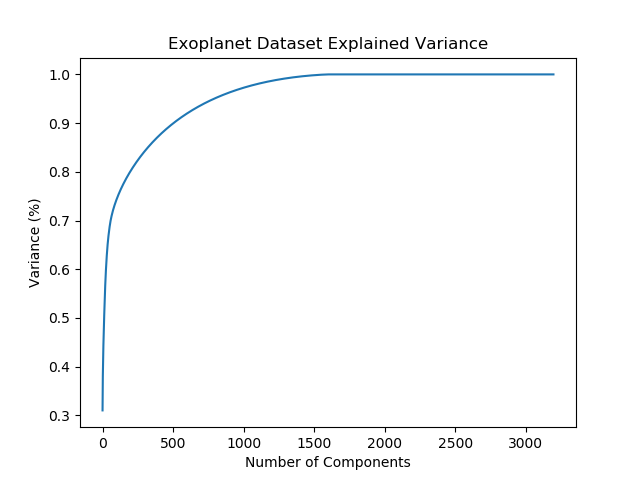

In [94]:
pca = PCA().fit(X_train)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlim(0, 50)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Exoplanet Dataset Explained Variance')
plt.show()

In [97]:
pca = PCA(n_components=1000)
dataset = pca.fit_transform(X_train)
dataset_test = pca.transform(X_test)
pc_num = pca.n_components

In [99]:
logisticRegr = LogisticRegression(solver = 'lbfgs', max_iter=200)
logisticRegr.fit(dataset, Y_train)
predicted = logisticRegr.predict(dataset_test)
#logisticRegr.score(df_test.iloc[:, 1:] , df_test.iloc[:, 0])
target_actual = pd.Series(Y_test, name='Actual')
target_predicted = pd.Series(predicted, name='Predicted')
confusion_mat = pd.crosstab(target_actual, target_predicted)
confusion_mat

Predicted,1,2
Actual,,
1,564,1
2,1,4


In [ ]:
#%%time
#svcModel = SVC(kernel='linear', C=1)
#predicted = svcModel.fit(X_train, Y_train)
#svc_predicted = svcModel.predict(df_test.iloc[:, 1:])

In [ ]:
#actual = df_test.iloc[:, 0]
#target_actual = pd.Series(actual, name='Actual')
#target_predicted = pd.Series(svc_predicted, name='Predicted')
#df_confusion = pd.crosstab(target_actual, target_predicted)

In [ ]:
#df_confusion

In [ ]:
#%%time
#svclassifier = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
#svclassifier.fit(X_train, Y_train)
#svm_predicted = svclassifier.predict(df_test.iloc[:, 1:])

In [ ]:
#actual = df_test.iloc[:, 0]
#target_actual = pd.Series(actual, name='Actual')
#target_predicted = pd.Series(svm_predicted, name='Predicted')
#confusion_mat = pd.crosstab(target_actual, target_predicted)

In [ ]:
#confusion_mat

In [ ]:
#%%time
#svcModel = SVC(kernel='poly', C=1)
#predicted = svcModel.fit(X_train, Y_train)
#svc_predicted = svcModel.predict(df_test.iloc[:, 1:])

In [ ]:
#actual = df_test.iloc[:, 0]
#target_actual = pd.Series(actual, name='Actual')
#target_predicted = pd.Series(svm_predicted, name='Predicted')
#confusion_mat = pd.crosstab(target_actual, target_predicted)

In [ ]:
#confusion_mat

In [ ]:
import scipy
def spectrum_getter(X) :
    Spectrum = scipy.fft(X, n=X.size)
    return np.abs(Spectrum)

In [ ]:
new_X_train = df_const.iloc[:,1:]

new_X_test = df_test_const.iloc[:,1:]
new_X_train.head()
print(new_X_train.shape)

In [ ]:
X_train_sp = new_X_train.apply(spectrum_getter, axis=1)
X_test_sp = new_X_train.apply(spectrum_getter, axis=1)
print(X_train_sp)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(actual, svm_predicted))
print(classification_report(actual, svm_predicted))

In [ ]:
plt.figure()
plt.plot(time, x_train[153,:])
plt.xlabel('Time')
plt.ylabel('Flux Level')
plt.title('Non-Exoplanet Flux Graph')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=[0,1])
data_rescaled = scaler.fit_transform(x_train)
data_rescaled

In [93]:
pca = PCA().fit(X_train)

In [ ]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlim(0, 50)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Exoplanet Dataset Explained Variance')
plt.show()

In [ ]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0, 50)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Exoplanet Dataset Explained Variance')
plt.show()

In [ ]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0, 15)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Exoplanet Dataset Explained Variance')
plt.show()

In [ ]:
pca = PCA(n_components=13)
dataset = pca.fit_transform(data_rescaled)
pc_num = pca.n_components

In [ ]:
pc_features = []

for k in range(1,pc_num+1):
    s = 'Principal Component ' + str(k)
    pc_features.append(s)
pc_features

In [ ]:
pdf = pd.DataFrame(data = dataset, columns = pc_features)
pdf.head(6)

In [ ]:
pdf_train = pd.concat([df[['LABEL']], pdf], axis = 1)
pdf_train = pdf_train.replace(1,'Non-Exoplanet')
pdf_train = pdf_train.replace(2,'Exoplanet')
pdf_train.head(6)

In [ ]:
var_ratio = pca.explained_variance_ratio_
var_sum = sum(var_ratio)
print(var_ratio)
print(np.cumsum(var_ratio))
print("Total explained variance: = {0:f}%".format(var_sum))

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

labels = ['Non-Exoplanet','Exoplanet']
colors = ['r', 'g', 'b']
for label, color in zip(labels,colors):
    indicesToKeep = pdf_train['LABEL'] == label
    ax.scatter(pdf_train.loc[indicesToKeep, 'Principal Component 1']
              , pdf_train.loc[indicesToKeep, 'Principal Component 2']
              , pdf_train.loc[indicesToKeep, 'Principal Component 3']
              , label = label
              , c = color
              , s = 50)

ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_zlabel('PC 3', fontsize = 15)
ax.set_title('First 3 Components PCA', fontsize = 20)
ax.legend(labels)
ax.grid()

In [ ]:
df_test = pd.read_csv("/Users/Nik Hadri Mahmod/Documents/Search of Exoplanets/exoTest.csv")
df_test.head(6)

In [ ]:
x_test = df_test.iloc[:,1:].values
X_test_t = x_test
print(X_test_t.shape)

In [ ]:
scaler = MinMaxScaler(feature_range=[0,1])
from sklearn.preprocessing import StandardScaler
scaler_final = StandardScaler()
X_t = x_train
print(X_t.shape)
#scaler_final.fit_transform(X_t)

#scaler_final

In [ ]:
X_demo = np.array([[2, 0, 3],
                  [1, 1, 1],
                  [0, 2, 0]])
X_demo

In [ ]:
first_row = X_demo[0,:]
print(first_row.mean())
print(first_row.std())
print((2-X_demo.mean())/X_demo.std())



In [ ]:
first_column = X_demo[:,2]
print(first_column.mean())
print(first_column.std())
print((0-first_column.mean())/first_column.std())

In [ ]:
scaler_demo = StandardScaler()
data_demo = scaler_demo.fit_transform(X_demo)
data_demo

In [ ]:
data_rescaled_t = scaler.fit_transform(X_t)
print(data_rescaled_t[0,:])
print(data_rescaled_t.shape)
print(scaler.scale_)

In [ ]:
data_test_rescaled = scaler.transform(X_test_t)
print(data_rescaled_t.shape)

In [ ]:
pca = PCA().fit(data_rescaled_t)

In [ ]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.xlim(0, 50)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Exoplanet Dataset Explained Variance')
plt.show()

In [ ]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0, 50)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Exoplanet Dataset Explained Variance')
plt.show()

In [ ]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0, 15)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Exoplanet Dataset Explained Variance')
plt.show()

In [ ]:
print(data_rescaled_t)
pca = PCA(n_components=13)
dataset = pca.fit_transform(data_rescaled_t)
dataset_test = pca.transform(data_test_rescaled)
pc_num = pca.n_components
dataset.shape

In [ ]:
var_ratio = pca.explained_variance_ratio_
var_sum = sum(var_ratio)
print(var_ratio)
print(np.cumsum(var_ratio))
print("Total explained variance: = {0:f}%".format(var_sum))

In [ ]:
pc_features = []

for k in range(1,pc_num+1):
    s = 'Principal Component ' + str(k)
    pc_features.append(s)
pc_features

In [ ]:
#pca = PCA().fit_transform(data_rescaled_t)

In [ ]:
pdf_final = pd.DataFrame(data = dataset, columns = pc_features)
pdf_final.head(6)

In [ ]:
pdf_final = pd.concat([df[['LABEL']], pdf_final], axis = 1)

In [ ]:
pdf_final = pdf_final.replace(1,'Non-Exoplanet')
pdf_final = pdf_final.replace(2,'Exoplanet')
print(pdf_final.shape)
pdf_final.head(6)

In [ ]:
var_ratio = pca.explained_variance_ratio_
var_sum = sum(var_ratio)
print(var_ratio)
print(np.cumsum(var_ratio))
print("Total explained variance: = {0:f}%".format(var_sum))

First 3 Principal Components yield 87.58% of the information given 
PC 1 yields 85.97%, PC 2 yields 0.10%, and PC 3 yields 0.057% of the information

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

labels = ['Non-Exoplanet','Exoplanet']
colors = ['r', 'g', 'b']
for label, color in zip(labels,colors):
    indicesToKeep = pdf_final['LABEL'] == label
    ax.scatter(pdf_final.loc[indicesToKeep, 'Principal Component 1']
              , pdf_final.loc[indicesToKeep, 'Principal Component 2']
              , pdf_final.loc[indicesToKeep, 'Principal Component 3']
              , label = label
              , c = color
              , s = 50)

ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_zlabel('PC 3', fontsize = 15)
ax.set_title('First 3 Components PCA', fontsize = 20)
ax.legend(labels)
ax.grid()

In [ ]:
target_label = df_test['LABEL']
#target_label
#target_label.replace(1,'Non-Exoplanet')
#target_label.replace(2,'Exoplanet')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#cross_val_score(LogisticRegression(), dataset, pdf_final['LABEL'])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
logisticRegr.fit(dataset, pdf_final['LABEL'])

In [ ]:
predicted = logisticRegr.predict(dataset_test)

In [ ]:
df_test = df_test.replace(1,'Non-Exoplanet')
df_test = df_test.replace(2,'Exoplanet')

In [ ]:
logisticRegr.score(dataset_test, df_test['LABEL'])

In [ ]:
#cross_val_score(LogisticRegression(solver = 'lbfgs'), dataset, pdf_final['LABEL'])

In [ ]:
actual = df_test['LABEL']

In [ ]:
target_actual = pd.Series(actual, name='Actual')
target_predicted = pd.Series(predicted, name='Predicted')
df_confusion = pd.crosstab(target_actual, target_predicted)

In [ ]:
df_confusion

In [ ]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(target_actual, target_predicted)

In [ ]:
svcModel = SVC(kernel='linear', C=1)
predicted = svcModel.fit(dataset, pdf_final['LABEL'])
svc_predicted = svcModel.predict(dataset_test)

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

In [ ]:
print ('Accuracy:', accuracy_score(actual, svc_predicted))
print ('F1 score:', f1_score(actual, svc_predicted,pos_label='Exoplanet'))
print ('Recall:', recall_score(actual, svc_predicted,pos_label='Exoplanet'))
print ('Precision:', precision_score(actual, svc_predicted, pos_label='Exoplanet'))
print ('\n clasification report:\n', classification_report(actual, svc_predicted))
print ('\n confussion matrix:\n',confusion_matrix(actual, svc_predicted))

In [ ]:
target_actual = pd.Series(actual, name='Actual')
target_predicted = pd.Series(predicted, name='Predicted')
df_confusion = pd.crosstab(target_actual, target_predicted)

In [ ]:
df_confusion

# PCA Projection to 2D

## Visualize 2D Projection

These two principle components only contain 49.91% of the information. The first and second principal contain 27.37% and 22.54% of the variance respectively. The rest is contained in the third and fourth principal component.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
cross_val_score(LogisticRegression(), pc_norm, train_label)

In [ ]:
cross_val_score(SVC(), pc_norm, train_label)